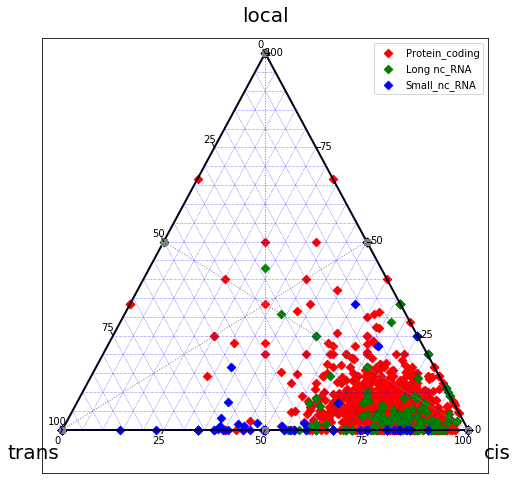

In [206]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib as mpl
import matplotlib.pyplot as plt
width, height = 8, 8
mpl.rcParams['figure.figsize'] = [width, height]

chrs = pd.read_csv("data_for_Jenya1", comment="#", sep="\t", header=None)

chrs.replace(np.nan, 0, inplace=True)
chrs

chrs_protein_coding=chrs[chrs[4] == ' protein_coding']
chrs_protein_coding=chrs_protein_coding.reset_index(drop=True)

chrs_Long_ncRNA=chrs[chrs[4] == ' Long ncRNA']
chrs_Long_ncRNA=chrs_Long_ncRNA.reset_index(drop=True)

chrs_Small_ncRNA=chrs[chrs[4] == ' Small ncRNA']
chrs_Small_ncRNA=chrs_Small_ncRNA.reset_index(drop=True)


def search(chrs):
    points=[]
    for i in range(1,len(chrs)):
        x = chrs.loc[i][0]
        y = chrs.loc[i][1]
        z = chrs.loc[i][2]
        points.append((float(x), float(y), float(z)))
    return points
    
    
points1=search(chrs_protein_coding)  
points2=search(chrs_Long_ncRNA)  
points3=search(chrs_Small_ncRNA)


import ternary
import random

scale = 100


    
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)
tax.gridlines(multiple=5, color="blue")


tax.left_corner_label("trans", fontsize=fontsize)
tax.right_corner_label("cis", fontsize=fontsize)
tax.top_corner_label("local", fontsize=fontsize)

#p1 = (75,100,50)
p1=(0,0,0)
p2 = (50, 50, 50)
tax.line(p1, p2, linewidth=1., marker='s', color='grey', linestyle=":")

p3=(0,50,50)
p4=(100,0,50)
tax.line(p3, p4, linewidth=1., marker='s', color='grey', linestyle=":")

p5=(50,0,50)
p6=(0,100,0)
tax.line(p5, p6, linewidth=1., marker='s', color='grey', linestyle=":")

tax.scatter(points1, marker='D', color='red', label="Protein_coding")
tax.scatter(points2, marker='D', color='green',label="Long nc_RNA")
tax.scatter(points3, marker='D', color='blue',label="Small_nc_RNA")

tax.legend()
tax.ticks(axis='lbr', linewidth=1, multiple=25)

    # Remove default Matplotlib Axes
tax.clear_matplotlib_ticks()
tax._redraw_labels()

    # Set ticks

tax.show()
